In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
data = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [122]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [123]:
data.shape

(2500, 13)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [125]:
data.isna().sum()/data.shape[0]*100

Area                 0.0
Perimeter            0.0
Major_Axis_Length    0.0
Minor_Axis_Length    0.0
Convex_Area          0.0
Equiv_Diameter       0.0
Eccentricity         0.0
Solidity             0.0
Extent               0.0
Roundness            0.0
Aspect_Ration        0.0
Compactness          0.0
Class                0.0
dtype: float64

In [126]:
data.duplicated().sum()

np.int64(0)

In [127]:
data.Class.value_counts()

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

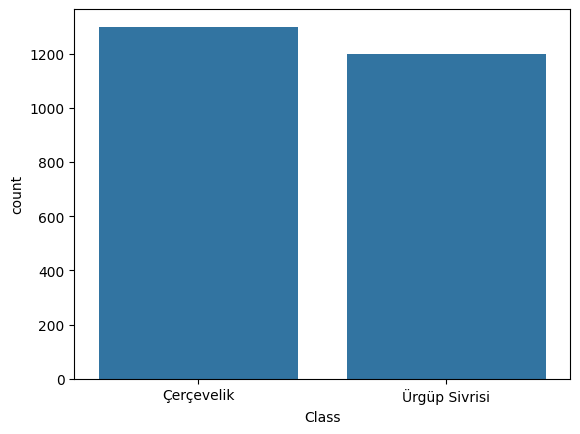

In [128]:
sns.countplot(data, x=data.Class)

In [129]:
num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

12


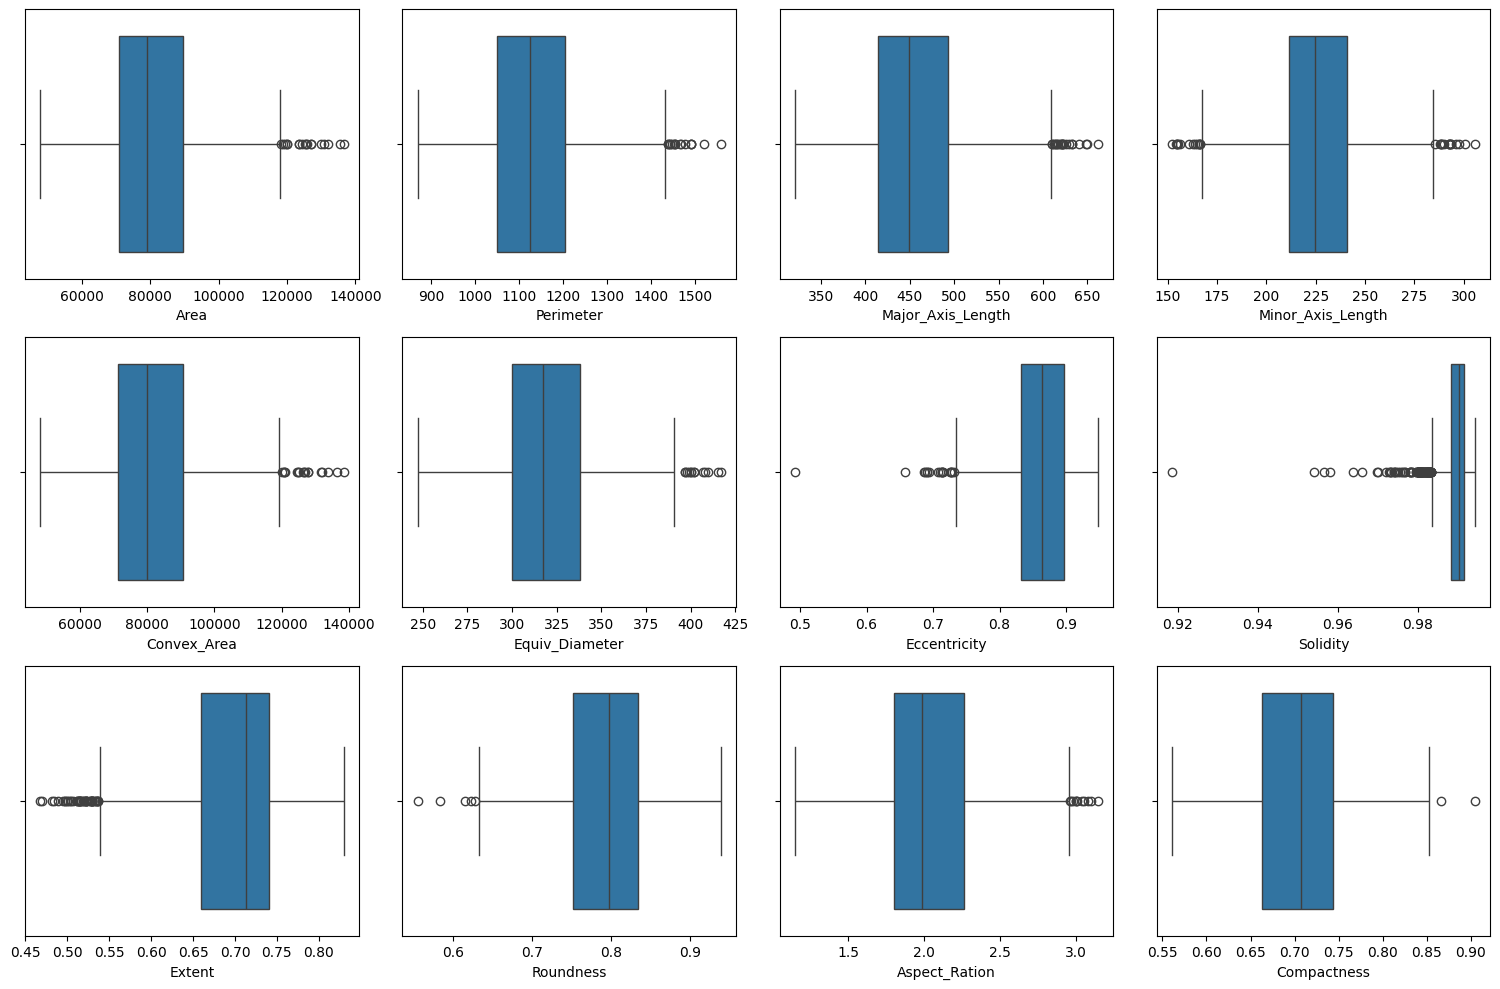

In [130]:
plt.figure(figsize=(15,10))

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(3, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [131]:
for i in data.select_dtypes('number').columns:
    data[i] = data[i].clip(lower=data[i].quantile(0.03), upper=data[i].quantile(0.97))

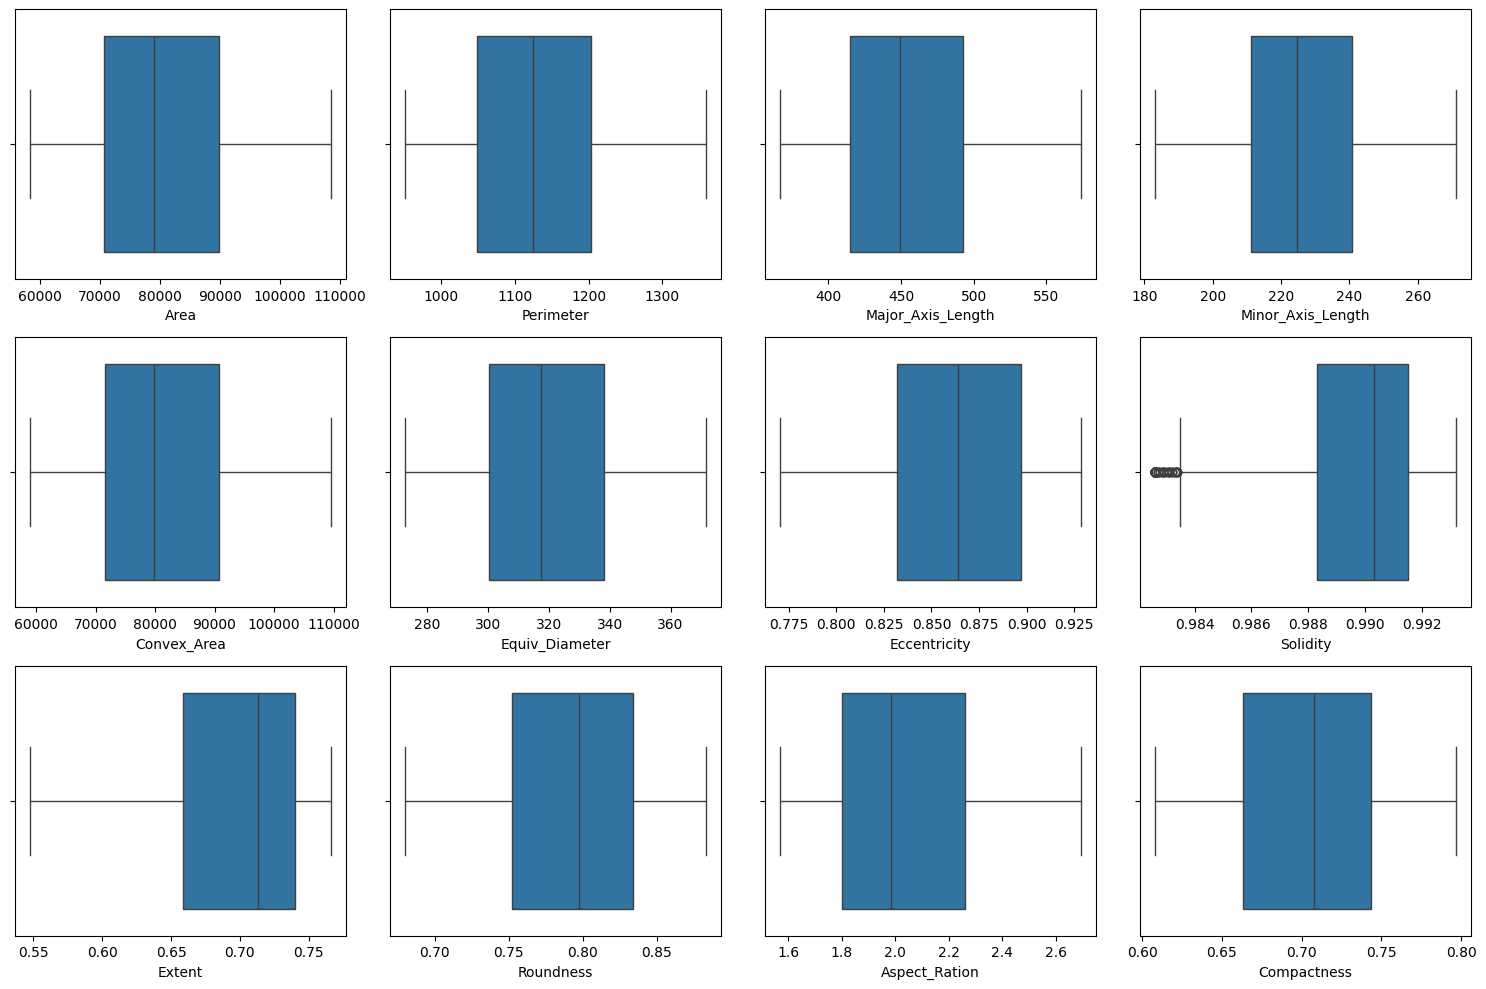

In [132]:
plt.figure(figsize=(15,10))

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(3, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [133]:
for i in data.select_dtypes('number').columns:
    li = data[['Solidity']]
    if i in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.05), upper=data[i].quantile(0.95))

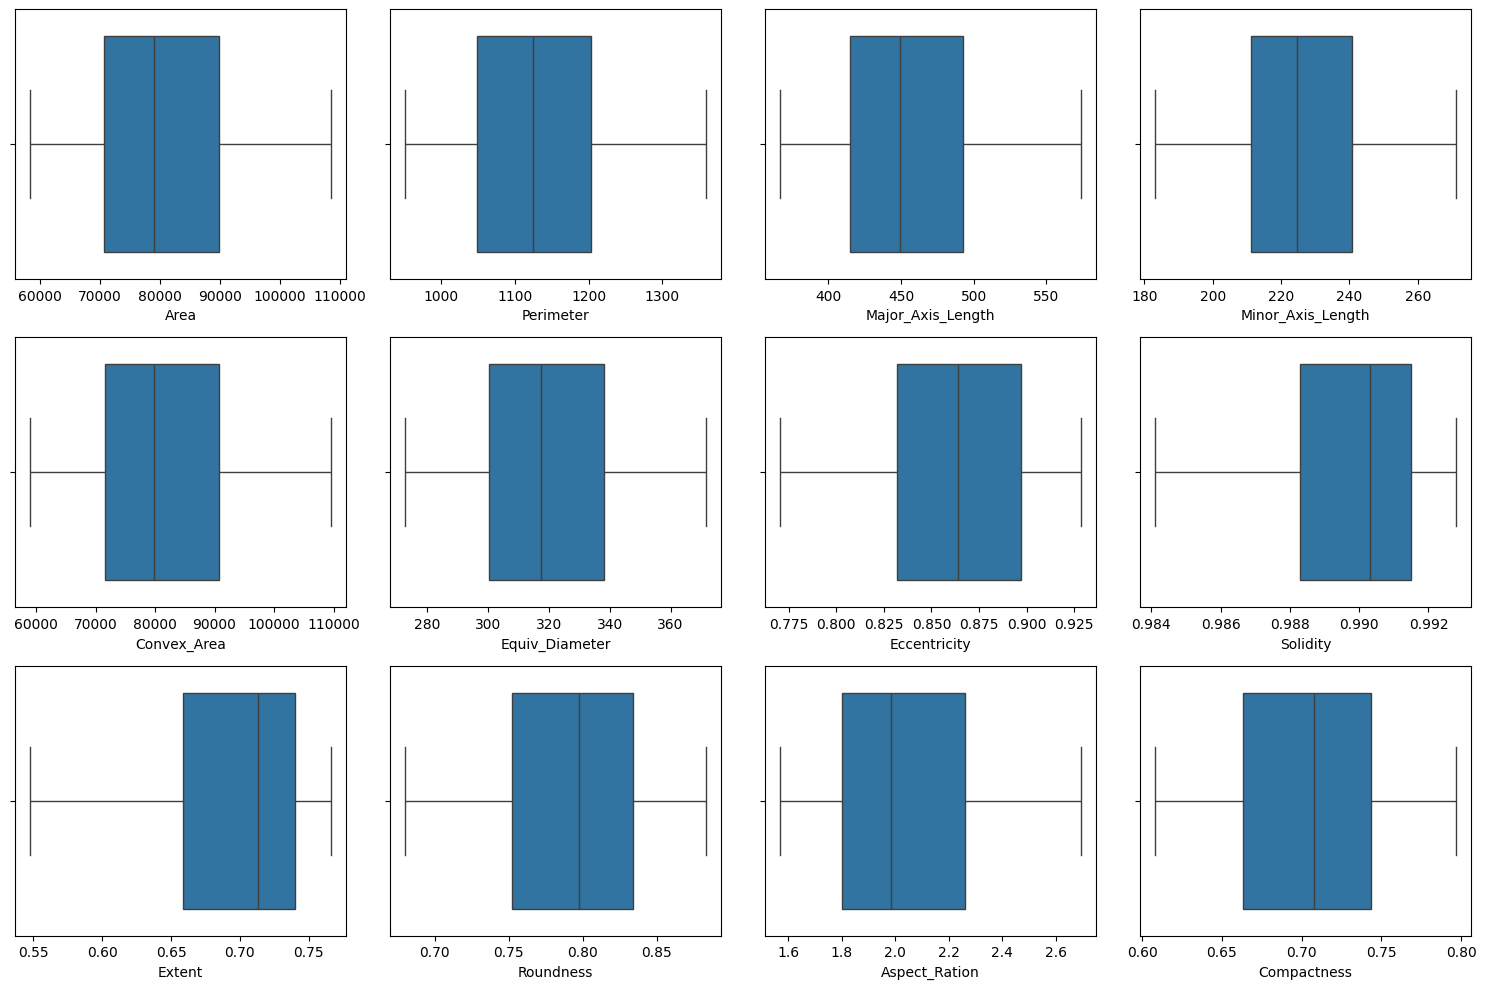

In [134]:
plt.figure(figsize=(15,10))

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(3, 4, count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [135]:
x = data.drop(['Class'],axis=1)
y = data.Class

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.25, random_state=0)

In [137]:
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [138]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [139]:
from sklearn.metrics import f1_score, accuracy_score

In [140]:
from sklearn.feature_selection import RFE

f1_score_list = []

for i in range(1, len(x.columns)+1):
    rfe_selector = RFE(estimator=rc, n_features_to_select=i, step=1)
    rfe_selector.fit(x_train_rfe,y_train_rfe)

    sel_x_train_rfe = rfe_selector.transform(x_train_rfe)
    sel_x_test_rfe = rfe_selector.transform(x_test_rfe)

    rc.fit(sel_x_train_rfe,y_train_rfe)
    rfe_preds = rc.predict(sel_x_test_rfe)

    f1_score_rfe = round(f1_score(y_test_rfe, rfe_preds, average="macro"), 3)
    f1_score_list.append(f1_score_rfe)

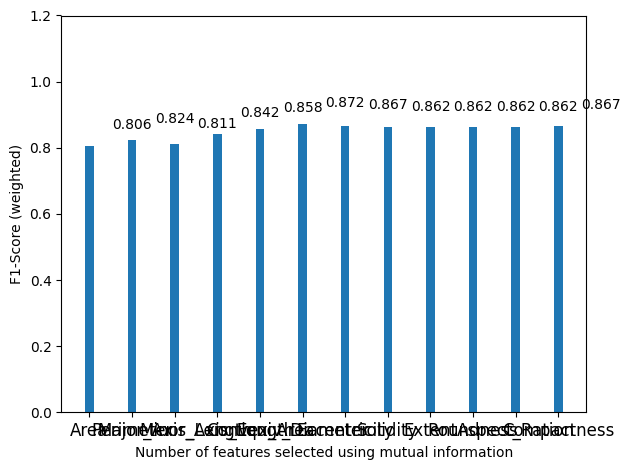

In [141]:
fig, ax = plt.subplots()

x_value = x.columns
y_value = f1_score_list

ax.bar(x_value,y_value,width=0.2)
ax.set_xlabel("Number of features selected using mutual information")
ax.set_ylabel("F1-Score (weighted)")
ax.set_ylim(0, 1.2)
ax.set_xticks(x_value)
ax.set_xticklabels(x_value, fontsize=12)

for i, v in enumerate(y_value):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')

plt.tight_layout()

In [142]:
rfe_selector = RFE(estimator=rc, n_features_to_select=8, step=1)
rfe_selector.fit(x_train_rfe,y_train_rfe)

selected_features_mask = rfe_selector.get_support()
selected_features = x_train_rfe.columns[selected_features_mask]
selected_features

Index(['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity',
       'Solidity', 'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

In [143]:
x_train = x_train[['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity',
       'Solidity', 'Roundness', 'Aspect_Ration', 'Compactness']]

x_test = x_test[['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity',
       'Solidity', 'Roundness', 'Aspect_Ration', 'Compactness']]

In [144]:
model = rc.fit(x_train,y_train)

In [145]:
preds = model.predict(x_test)

In [146]:
testing = pd.DataFrame(x_test).reset_index().drop('index',axis=1)
testing.head()

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Roundness,Aspect_Ration,Compactness
0,1134.996,452.2654,232.5943,0.8576,0.9911,0.8045,1.9444,0.7165
1,1098.634,462.7871,199.3336,0.9025,0.9904,0.7524,2.3217,0.6555
2,1081.761,439.2749,210.4540,0.8778,0.9898,0.7758,2.0873,0.6904
3,1077.192,428.8910,223.4677,0.8535,0.9900,0.8121,1.9193,0.7204
4,1046.245,418.6039,214.3956,0.8589,0.9909,0.8049,1.9525,0.7137


In [147]:
preds.tolist()

['Çerçevelik',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Çerçevelik',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Çerçevelik',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Çerçevelik',
 'Çerçevelik',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Çerçevelik',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi',
 'Çerçevelik',
 'Çerçevelik',
 'Ürgüp Sivrisi',
 'Ürgüp Sivrisi'

In [148]:
pred_actual = pd.DataFrame([preds,y_test],index=['predicted','actual']).transpose()
pred_actual

,predicted,actual
0,Çerçevelik,Çerçevelik
1,Ürgüp Sivrisi,Ürgüp Sivrisi
2,Çerçevelik,Ürgüp Sivrisi
3,Çerçevelik,Çerçevelik
4,Çerçevelik,Çerçevelik
...,...,...
620,Ürgüp Sivrisi,Ürgüp Sivrisi
621,Çerçevelik,Çerçevelik
622,Ürgüp Sivrisi,Çerçevelik
623,Çerçevelik,Çerçevelik


In [149]:
concat_data = pd.concat([testing,pred_actual],axis=1)
concat_data

,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Roundness,Aspect_Ration,Compactness,predicted,actual
0,1134.996,452.2654,232.594300,0.8576,0.9911,0.8045,1.9444,0.7165,Çerçevelik,Çerçevelik
1,1098.634,462.7871,199.333600,0.9025,0.9904,0.7524,2.3217,0.6555,Ürgüp Sivrisi,Ürgüp Sivrisi
2,1081.761,439.2749,210.454000,0.8778,0.9898,0.7758,2.0873,0.6904,Çerçevelik,Ürgüp Sivrisi
3,1077.192,428.8910,223.467700,0.8535,0.9900,0.8121,1.9193,0.7204,Çerçevelik,Çerçevelik
4,1046.245,418.6039,214.395600,0.8589,0.9909,0.8049,1.9525,0.7137,Çerçevelik,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...
620,1007.633,428.2693,183.046422,0.9098,0.9877,0.7343,2.4097,0.6418,Ürgüp Sivrisi,Ürgüp Sivrisi
621,1165.418,447.2711,271.244946,0.7950,0.9928,0.8781,1.6484,0.7772,Çerçevelik,Çerçevelik
622,1106.815,450.0162,218.358200,0.8744,0.9841,0.7879,2.0609,0.6949,Ürgüp Sivrisi,Çerçevelik
623,1141.660,446.9185,248.612700,0.8310,0.9911,0.8366,1.7976,0.7437,Çerçevelik,Çerçevelik


In [150]:
f1 = f1_score(y_test,preds,average='macro')
acc = accuracy_score(y_test,preds)
print(F"F1 Score: {f1:.2f}")
print(F"Accuracy Score: {acc:.2f}")

F1 Score: 0.87
Accuracy Score: 0.87


In [151]:
import pickle
pickle.dump(model,open(r'C:\Users\sevug\Desktop\New folder\bigdatahandson\pumpkin_seeds_prediction\testing\randomforest_model.pkl','wb'))